In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

from dmba import classificationSummary

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report

In [3]:
%matplotlib inline

In [4]:
# load data and look at first 5 rows

auctions = pd.read_csv('Hotel_Reservations.csv')
auctions.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
# to check the number of columns and rows

auctions.shape

(36275, 19)

In [6]:
# to check the total nulls in the dataset

auctions.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
# to see the datatype of different columns

auctions.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [8]:
# to check distinct values for each field

auctions['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [9]:
auctions['no_of_adults'].unique()

array([2, 1, 3, 0, 4], dtype=int64)

In [10]:
auctions['no_of_children'].unique()

array([ 0,  2,  1,  3, 10,  9], dtype=int64)

In [11]:
auctions['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [12]:
auctions['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [13]:
auctions['repeated_guest'].unique()

array([0, 1], dtype=int64)

In [14]:
auctions['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [15]:
   
auctions['avg_price_per_room'].unique()

array([ 65.  , 106.68,  60.  , ..., 118.43, 137.25, 167.8 ])

In [16]:
auctions['avg_price_per_room'].nunique()

3930

In [17]:
# to check if there are any duplicate values in the dataset

auctions.groupby('Booking_ID').agg(sum_alias_1=('Booking_ID', 'count')).sort_values(by=['sum_alias_1'], ascending=True)


,sum_alias_1
Booking_ID,
INN00001,1
INN24193,1
INN24192,1
INN24191,1
INN24190,1
...,...
INN12093,1
INN12094,1
INN12095,1


In [18]:
# to drop the 'Booking_id' column as it will not contribute in the classification

auctions2 = auctions.drop(["Booking_ID"], axis = 1)

In [19]:
auctions2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [20]:
from sklearn import preprocessing

In [21]:
# seperating the dataset into predictors and response variable

predictors_df = auctions2[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 
              'lead_time','arrival_year','arrival_month','arrival_date','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']]
response_df = auctions2['booking_status']



In [22]:
# determining the correlation between the predictors to identify strongly correlated variables 

predictors_df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


<AxesSubplot:>

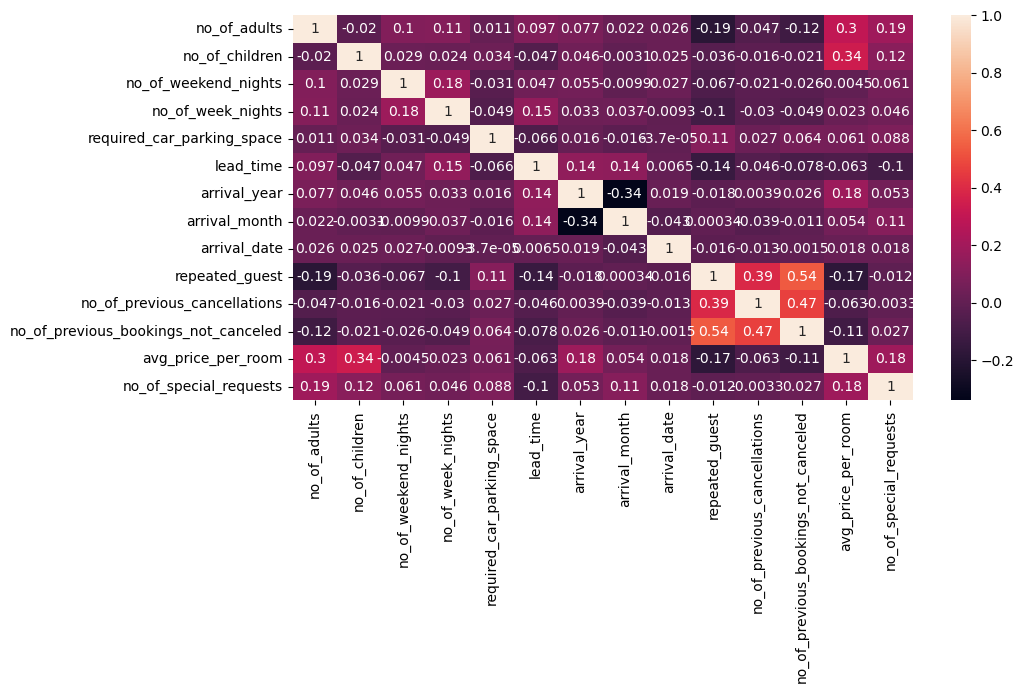

In [23]:
correlation_matrix = predictors_df.corr()

#sns.heatmap(correlation_matrix, annot = True)

plt.figure(figsize = (10,5))
sns.heatmap(correlation_matrix, annot=True)

In [24]:
predictors_df = predictors_df.drop(["arrival_year", "arrival_month","arrival_date"], axis = 1)

<AxesSubplot:>

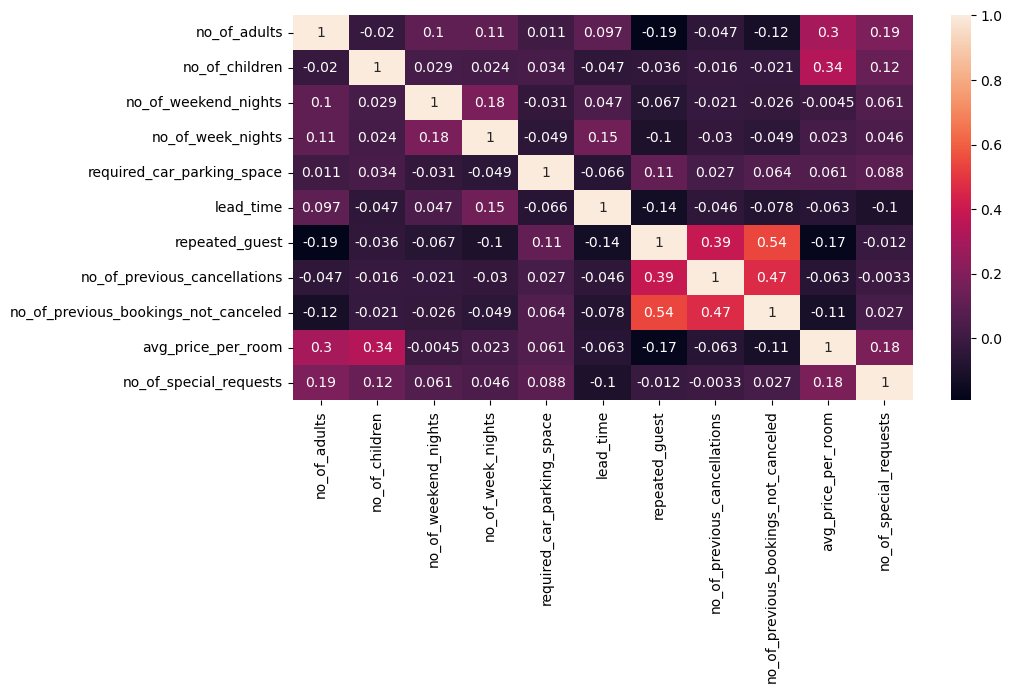

In [25]:
correlation_matrix = predictors_df.corr()

#sns.heatmap(correlation_matrix, annot = True)

plt.figure(figsize = (10,5))
sns.heatmap(correlation_matrix, annot=True)

In [27]:
# flagging the categorical varibales
predictors_df = pd.get_dummies(predictors_df, drop_first = True)
predictors_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,0,0,0,106.68,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,0,0,0,60.00,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,0,0,0,94.50,...,0,0,0,0,0,0,0,0,0,1


In [28]:
pd.set_option('display.max_columns', None)

In [29]:
#scaling the variables

z_score_norm = preprocessing.StandardScaler()
predictor_df_normalized = z_score_norm.fit_transform(predictors_df)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df.columns)
predictor_df_normalized.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.298893,-0.26147,0.217401,-0.144803,-0.178819,1.614896,-0.16221,-0.063393,-0.087456,-1.095033,-0.788140,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,1.563833,-1.333174
1,0.298893,-0.26147,1.365993,0.563972,-0.178819,-0.933701,-0.16221,-0.063393,-0.087456,0.092806,0.483760,-0.316611,-0.011741,2.463970,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
2,-1.628975,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,-0.16221,-0.063393,-0.087456,-1.237528,-0.788140,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
3,0.298893,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,-0.16221,-0.063393,-0.087456,-0.097567,-0.788140,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
4,0.298893,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,-0.16221,-0.063393,-0.087456,-0.254312,-0.788140,-0.316611,-0.011741,2.463970,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
5,0.298893,-0.26147,-0.931190,-0.144803,-0.178819,3.034663,-0.16221,-0.063393,-0.087456,0.329918,0.483760,3.158448,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
6,0.298893,-0.26147,0.217401,0.563972,-0.178819,-0.596215,-0.16221,-0.063393,-0.087456,0.117600,0.483760,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
7,0.298893,-0.26147,0.217401,0.563972,-0.178819,-0.025981,-0.16221,-0.063393,-0.087456,0.062312,0.483760,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,2.233593,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
8,2.226761,-0.26147,-0.931190,1.272747,-0.178819,0.416241,-0.16221,-0.063393,-0.087456,-0.185914,0.483760,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,1.563833,-1.333174
9,0.298893,-0.26147,-0.931190,1.981521,-0.178819,-0.479841,-0.16221,-0.063393,-0.087456,0.855439,3.027561,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,2.233593,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090


In [30]:
# mapping the not_canceled and canceled values to binary response.
response_df = response_df.map({'Not_Canceled': 0, 'Canceled': 1})


In [31]:
response_df.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [32]:
# partition data into train and test sets

X_classifier = predictor_df_normalized
y_classifier = response_df
train_X_classifier, test_X_classifier, train_y_classifier, test_y_classifier = train_test_split(X_classifier, 
                                                            y_classifier, test_size=0.3, random_state=616)

In [33]:
# training the k-NN model and printing the F1 score

knn = KNeighborsClassifier(n_neighbors=5).fit(train_X_classifier, train_y_classifier)
predicted_y_training = knn.predict(train_X_classifier)
f1_score(train_y_classifier, predicted_y_training)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8324331114181637

In [34]:
# performance of k-NN on test data

predicted_y_test = knn.predict(test_X_classifier)
f1_score(test_y_classifier, predicted_y_test)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7536848072562359

In [35]:
# training a classifier for different values of k

results = []
for k in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=k).fit(train_X_classifier, train_y_classifier)
    results.append({
        'k': k,
        'f1_score': f1_score(test_y_classifier, knn2.predict(test_X_classifier))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

     k  f1_score
0    1  0.762153
1    2  0.732346
2    3  0.760879
3    4  0.740347
4    5  0.753685
5    6  0.738752
6    7  0.749362
7    8  0.735543
8    9  0.745260
9   10  0.737873
10  11  0.741379
11  12  0.736357
12  13  0.739331
13  14  0.733165
14  15  0.739130
15  16  0.734517
16  17  0.738466
17  18  0.731039
18  19  0.737011


In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# training the Random Forest classifier model


GB_MNIST = GradientBoostingClassifier(random_state=13).fit(train_X_classifier, train_y_classifier)
predicted_y_training_MNIST = GB_MNIST.predict(train_X_classifier)
print(f1_score(train_y_classifier, predicted_y_training_MNIST, average='macro'))
print(classification_report(train_y_classifier, predicted_y_training_MNIST))

0.8252235992864947
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     17148
           1       0.83      0.69      0.75      8244

    accuracy                           0.85     25392
   macro avg       0.85      0.81      0.83     25392
weighted avg       0.85      0.85      0.85     25392



In [37]:
# testing the Random Forest classifier model

predicted_y_test_MNIST = GB_MNIST.predict(test_X_classifier)
print(f1_score(test_y_classifier, predicted_y_test_MNIST, average='macro'))
print(classification_report(test_y_classifier, predicted_y_test_MNIST))

0.8156647359526816
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      7242
           1       0.81      0.69      0.75      3641

    accuracy                           0.84     10883
   macro avg       0.83      0.80      0.82     10883
weighted avg       0.84      0.84      0.84     10883

